# Importing Library and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = '/content/drive/MyDrive/Project/AIO/opsd_germany_daily.csv'

data = pd.read_csv(data_path)

In [4]:
data.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
data = data.set_index('Date')
data.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [6]:
# Thêm cột year, month, weekday name
data = pd.read_csv(data_path, index_col=0, parse_dates=True)

data['year'] = data.index.year
data['month'] = data.index.month
data['weekday_name'] = data.index.day_name()

data.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday_name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


# Time series Indexing

In [7]:
data.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday_name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [8]:
data.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday_name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


# Visualizing Time series data

<Axes: xlabel='Date'>

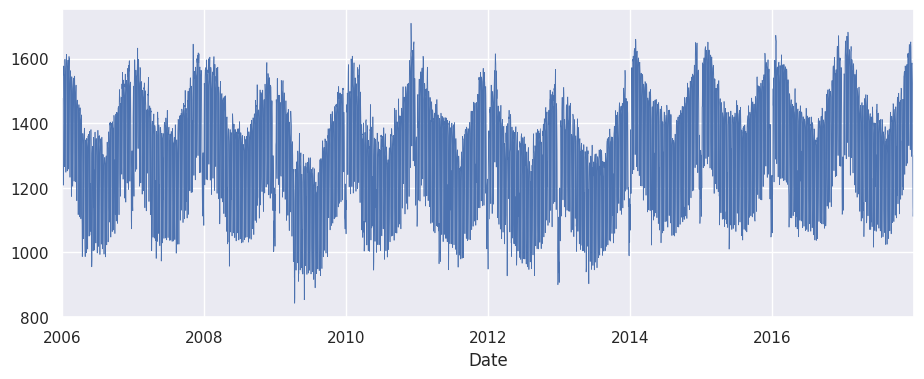

In [9]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11,4)})

data['Consumption'].plot(linewidth=0.5)

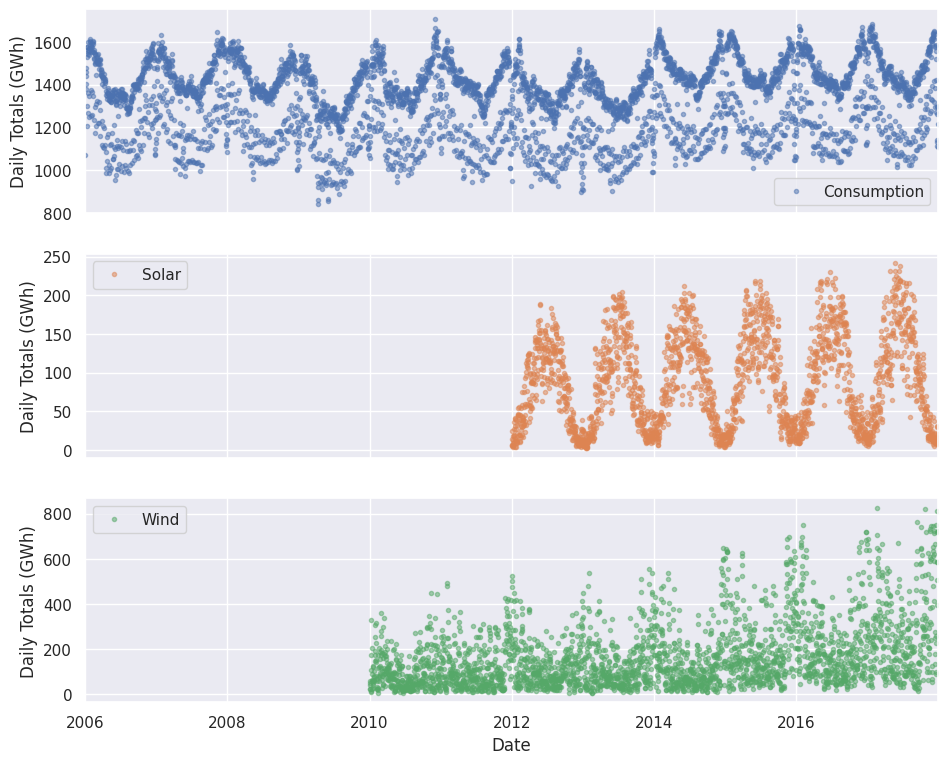

In [10]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
for ax in axes:
  ax.set_ylabel('Daily Totals (GWh)')
plt.show()

# Seasonality

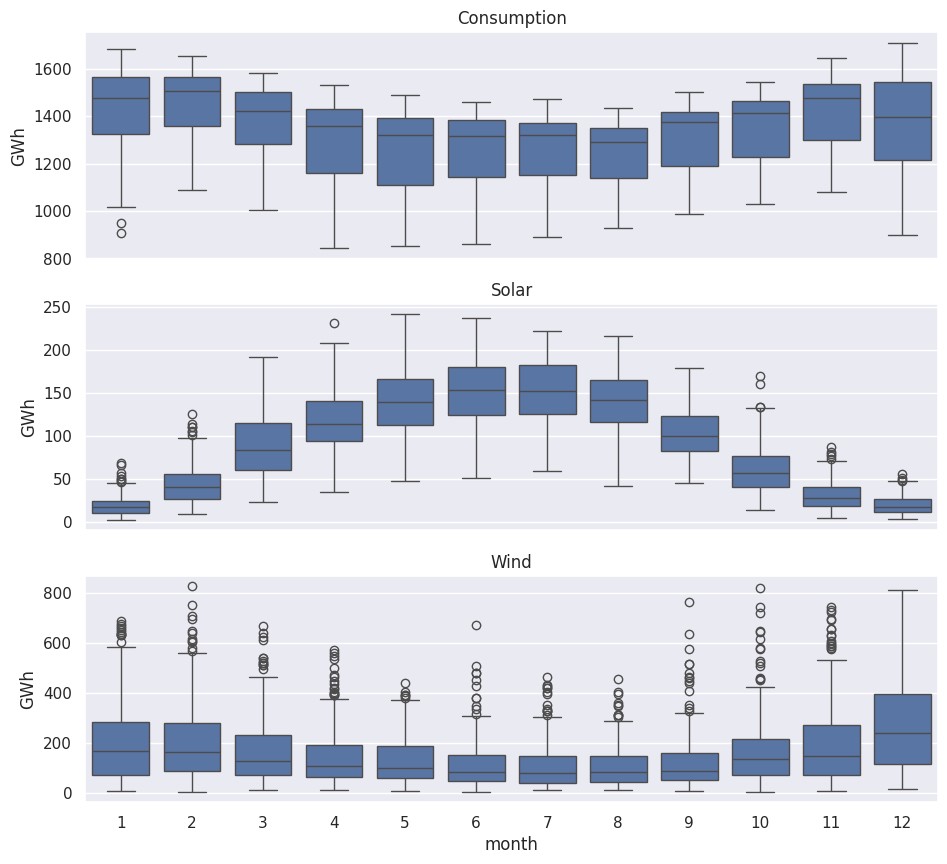

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(11,10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=data, x='month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)

  if ax != axes[-1]:
    ax.set_xlabel('')

plt.show()

# Frequencies

In [12]:
pd.date_range('1998-03-10','1998-03-15',freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# To select an arbitrary sequence of date / time values from a pandas time series ,
# we need to use a DatetimeIndex , rather than simply a list of date / time strings

times_sample = pd. to_datetime ([ '2013-02-03','2013-02-06','2013-02-08'])

# Select the specified dates and just the Consumption column

In [14]:
consum_sample = data.loc[times_sample,['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [15]:
consum_freq = consum_sample.asfreq('D')
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [16]:
consum_freq['Consumtion Forward Fill'] = consum_sample.asfreq('D', method ='ffill')
consum_freq

,Consumption,Consumtion Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


# Resampling

In [17]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency , aggregating with mean
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean.head(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


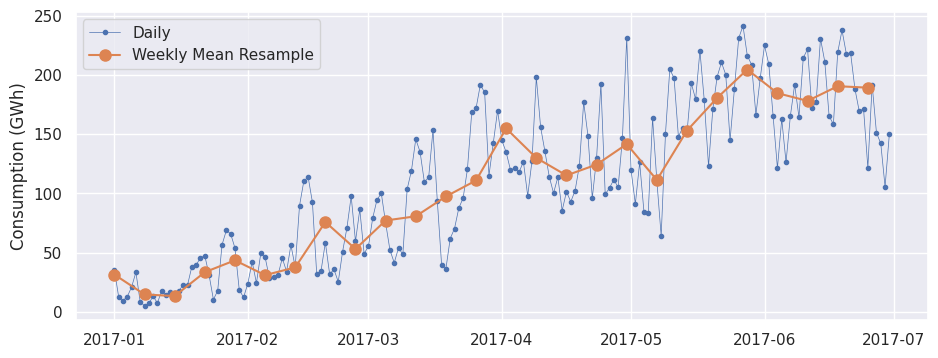

In [20]:
start, end = '2017-01','2017-06'

fig, ax = plt.subplots()
ax.plot(data.loc[start:end,'Solar'],
      marker = '.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'],
        marker = 'o', markersize = 8, linestyle = '-', label = 'Weekly Mean Resample')
ax.set_ylabel('Consumption (GWh)')
ax.legend()
plt.show()

In [25]:
# Compute the annual sums , setting the value to NaN for any year which has
# fewer than 360 days of data
data_annual = data[data_columns].resample('Y').sum(min_count=360)

# The default index of the resampled DataFrame is the last day of each year ,
# ( ’2006 -12 -31 ’ , ’2007 -12 -31 ’ , etc .) so to make life easier , set the index
# to the year component
data_annual = data_annual.set_index(data_annual.index.year)
data_annual.index.name = 'Year'
data_annual['Wind+Solar/Consumption'] = data_annual['Wind+Solar']/data_annual['Consumption']
data_annual.tail(5)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


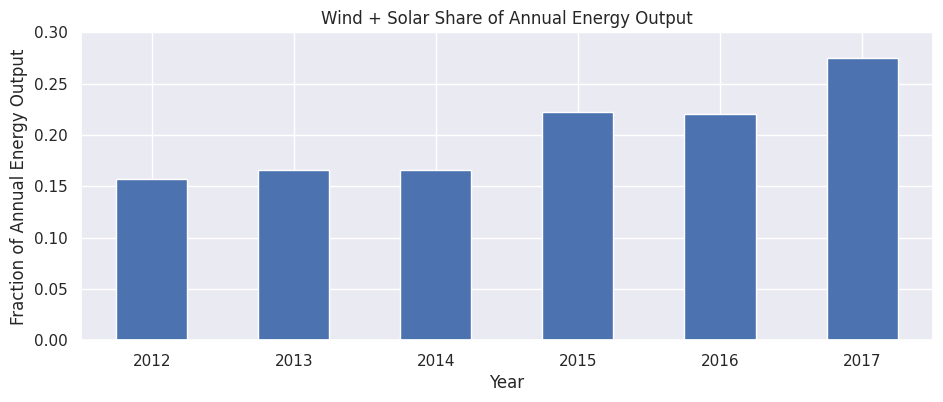

In [27]:
# Plot from 2012 onwards , because there is no solar production data in earlier years
ax = data_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction of Annual Energy Output')
ax.set_ylim(0,0.3)
ax.set_title('Wind + Solar Share of Annual Energy Output')
plt.xticks(rotation=0)
plt.show()

# Rolling Window

In [28]:
data_7d = data[data_columns].rolling(7, center=True).mean()
data_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


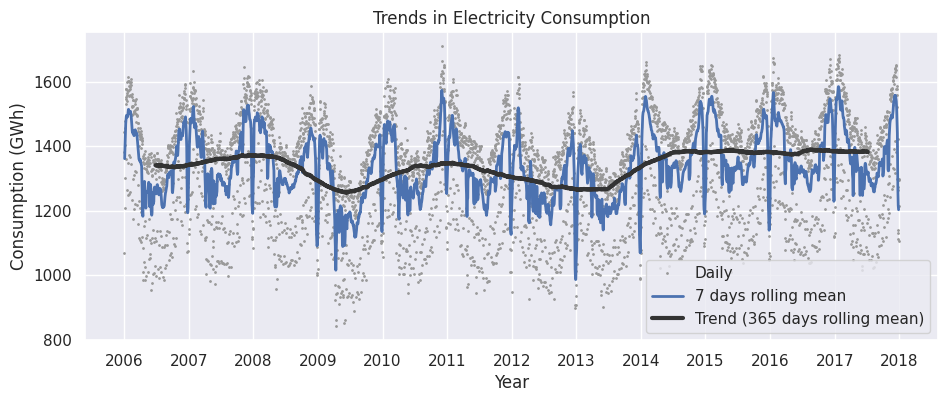

In [31]:
import matplotlib.dates as mdates
data_365d = data[data_columns].rolling(window=365, center=True, min_periods=360).mean()

fig, ax = plt.subplots()
ax.plot(data['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(data_7d['Consumption'], linewidth=2, label='7 days rolling mean')
ax.plot(data_365d['Consumption'], color='0.2',linewidth=3, label='Trend (365 days rolling mean)')
# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');
plt.show()

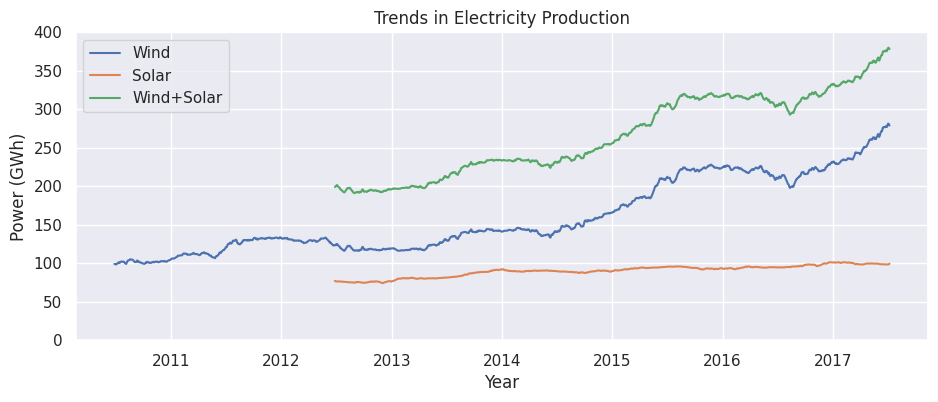

In [34]:
# Plot 365 - day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind','Solar','Wind+Solar']:
  ax.plot(data_365d[nm], label=nm)
  # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
  ax.xaxis.set_major_locator(mdates.YearLocator())
  ax.set_ylim(0,400)
  ax.legend()
  ax.set_xlabel('Year')
  ax.set_ylabel('Power (GWh)')
  ax.set_title('Trends in Electricity Production')
plt.show()